In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv("clean_data.csv", index_col=[0])

In [4]:
df.set_index("eventid", inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130107 entries, 197001000001 to 201701270001
Data columns (total 51 columns):
iyear               130107 non-null int64
imonth              130107 non-null int64
iday                130107 non-null int64
extended            130107 non-null int64
country             130107 non-null int64
country_txt         130107 non-null object
region              130107 non-null int64
region_txt          130107 non-null object
vicinity            130107 non-null int64
crit1               130107 non-null int64
crit2               130107 non-null int64
crit3               130107 non-null int64
doubtterr           130107 non-null int64
multiple            130107 non-null int64
success             130107 non-null int64
suicide             130107 non-null int64
attacktype1         130107 non-null int64
attacktype1_txt     130107 non-null object
targtype1           130107 non-null int64
targtype1_txt       130107 non-null object
gname               130107 n

In [6]:
df.country_txt.nunique()

184

In [7]:
df.country_txt.value_counts().head()

Iraq           19609
Pakistan       12132
Afghanistan     9704
India           9621
Colombia        6727
Name: country_txt, dtype: int64

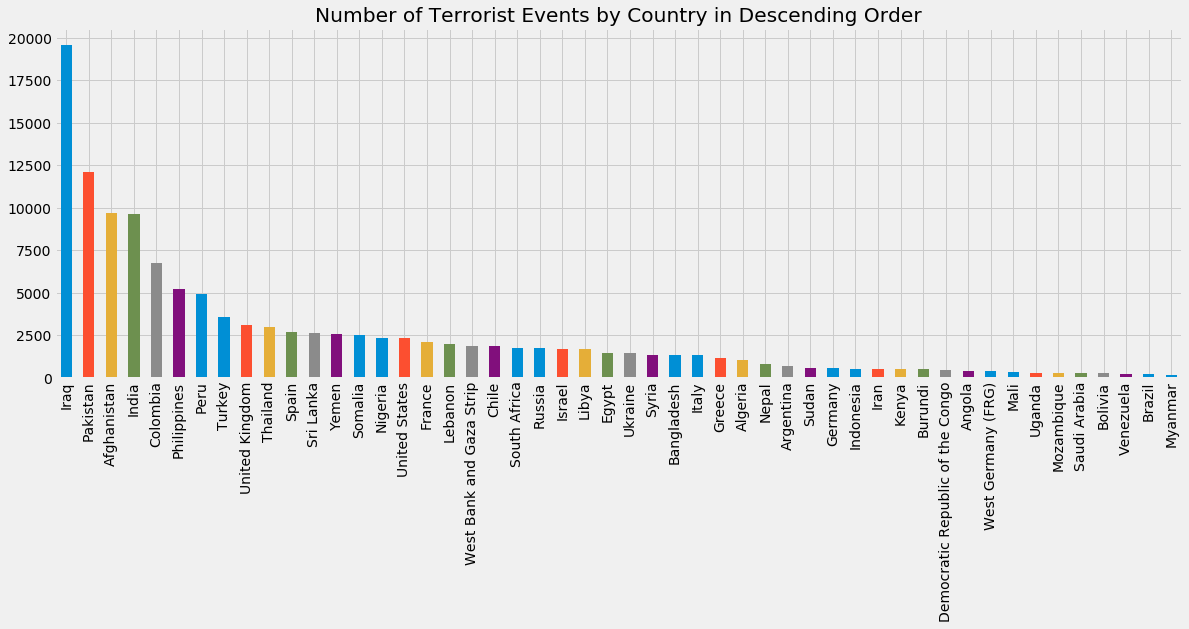

In [8]:
df.country_txt.value_counts().iloc[:50].plot(kind = "bar", figsize = (18, 6))
plt.title("Number of Terrorist Events by Country in Descending Order");

Text(0,0.5,'Number of Events')

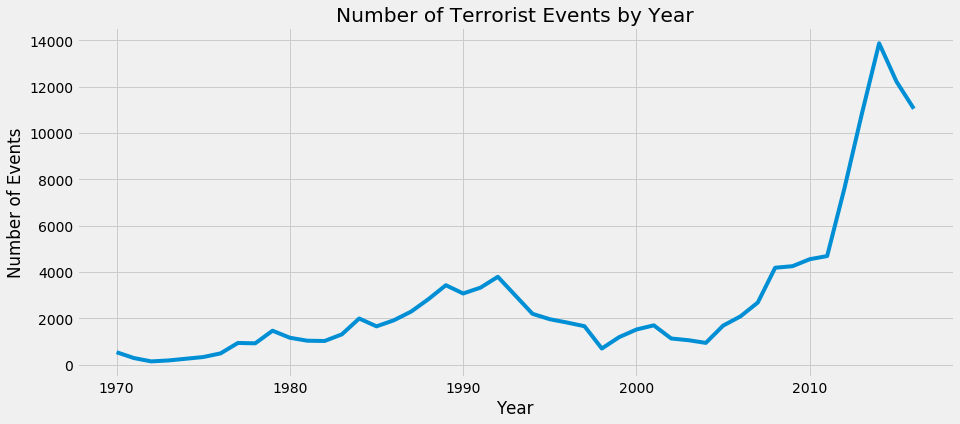

In [9]:
df.iyear.value_counts().sort_index().plot(figsize=(14, 6))
plt.title("Number of Terrorist Events by Year")
plt.xlabel("Year")
plt.ylabel("Number of Events")

In [10]:
df.extended.value_counts(normalize=True)

0    0.966797
1    0.033203
Name: extended, dtype: float64

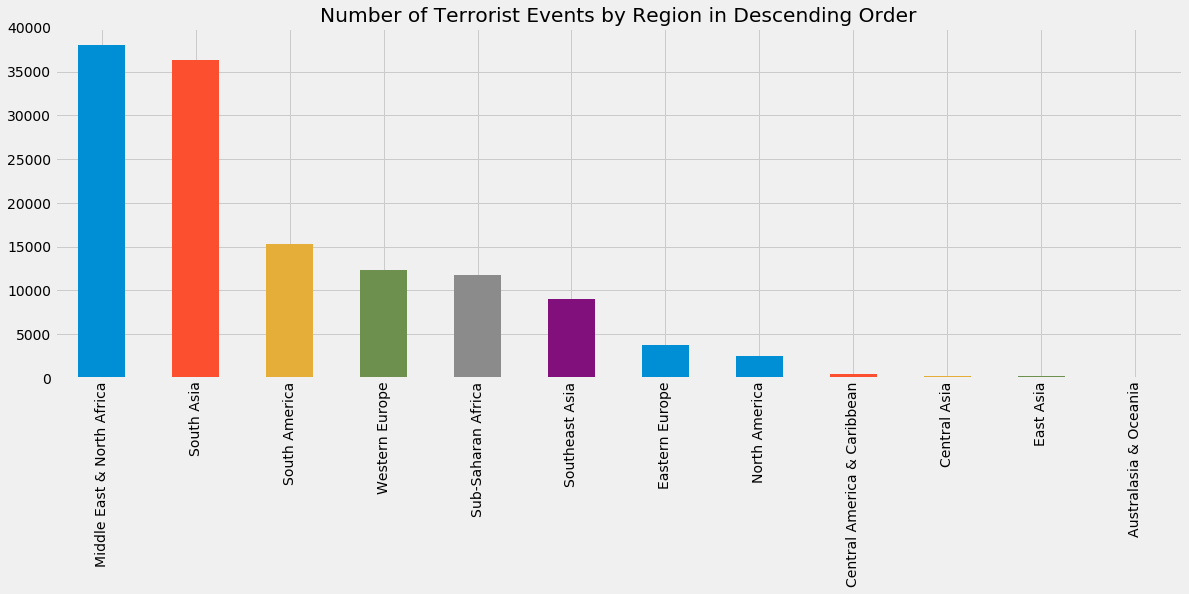

In [11]:
df.region_txt.value_counts().plot(kind = "bar", figsize = (18, 6))
plt.title("Number of Terrorist Events by Region in Descending Order");

In [12]:
df.vicinity.value_counts(normalize=True)

 0    0.925792
 1    0.073978
-9    0.000231
Name: vicinity, dtype: float64

In [13]:
df.crit1.value_counts()

1    128581
0      1526
Name: crit1, dtype: int64

In [14]:
df.crit2.value_counts()

1    129209
0       898
Name: crit2, dtype: int64

In [15]:
df.crit3.value_counts()

1    115761
0     14346
Name: crit3, dtype: int64

In [16]:
pd.crosstab(df.crit1, df.crit2)

crit2,0,1
crit1,,
0,0,1526
1,898,127683


In [17]:
pd.crosstab(df.crit1, df.crit3)

crit3,0,1
crit1,,
0,0,1526
1,14346,114235


In [18]:
pd.crosstab(df.crit2, df.crit3)

crit3,0,1
crit2,,
0,0,898
1,14346,114863


In [19]:
df.doubtterr.value_counts()

 0    102678
 1     19193
-9      8236
Name: doubtterr, dtype: int64

In [20]:
df.multiple

eventid
197001000001    0
197001010002    0
197001020001    0
197001020002    0
197001020003    0
197001030001    0
197001050001    0
197001060001    0
197001080001    0
197001090001    0
197001090002    0
197001120001    0
197001120002    0
197001130001    0
197001140001    0
197001150001    0
197001190002    0
197001190003    0
197001190004    0
197001210001    0
197001220001    0
197001250001    0
197001250002    0
197001260001    0
197001260003    0
197001270002    0
197001280002    0
197001300002    1
197001300003    0
197001310001    0
               ..
201612310004    0
201612310009    0
201612310010    0
201612310011    0
201612310012    0
201612310013    0
201612310014    0
201612310015    0
201612310016    0
201612310017    0
201612310019    0
201612310022    0
201612310023    0
201612310024    0
201612310025    0
201612310026    0
201612310027    1
201612310028    1
201612310029    0
201612310030    0
201612310033    0
201612310034    1
201612310035    1
201612310036    1
20

In [21]:
df.success.value_counts()

1    117303
0     12804
Name: success, dtype: int64

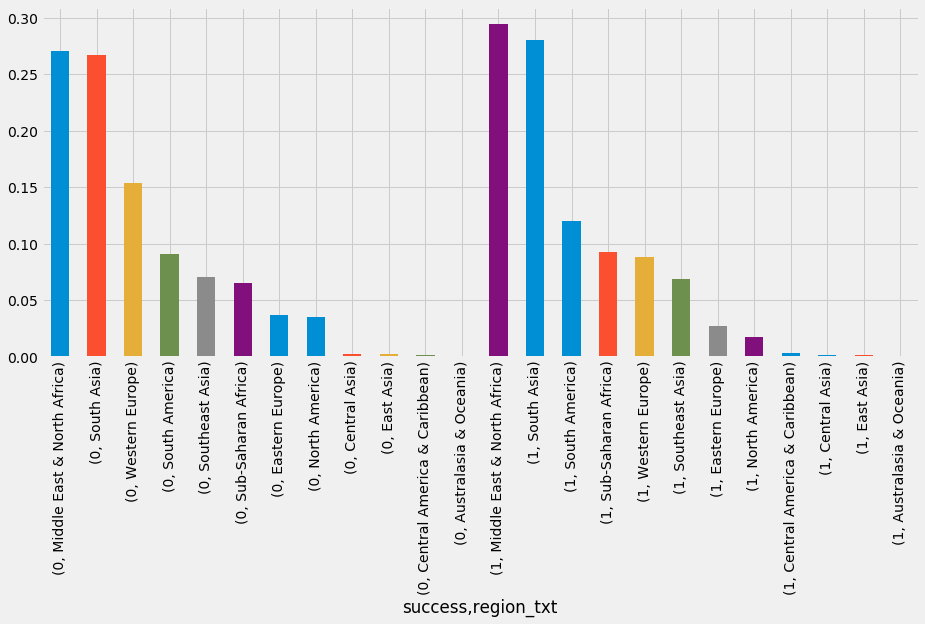

In [22]:
df.groupby("success").region_txt.value_counts(normalize=True).plot(kind = "bar", figsize = (14, 6))

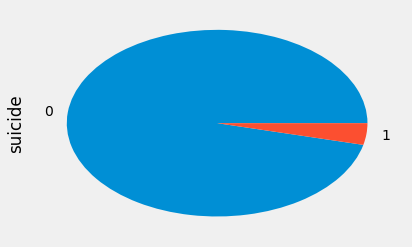

In [23]:
df.suicide.value_counts().plot(kind = "pie")

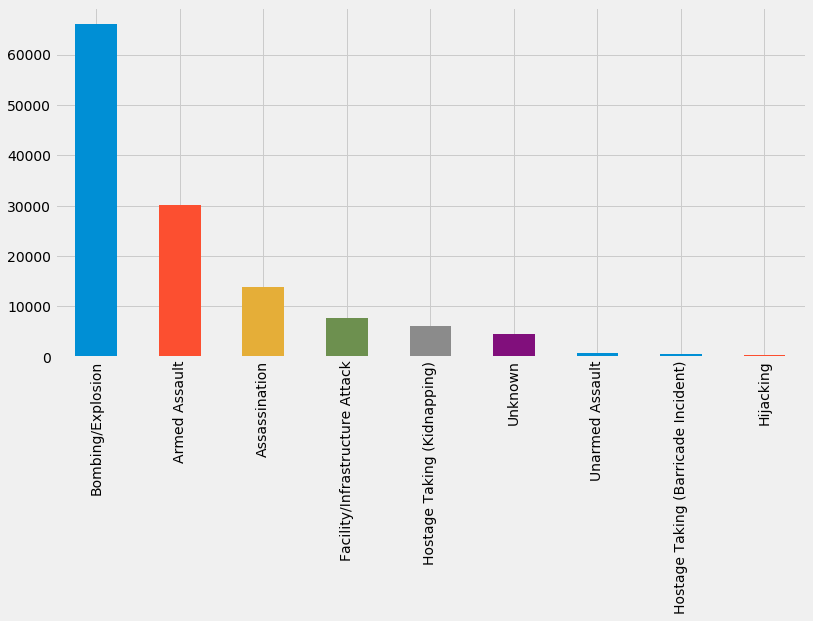

In [24]:
df.attacktype1_txt.value_counts().plot(kind = "bar", figsize= (12, 6))

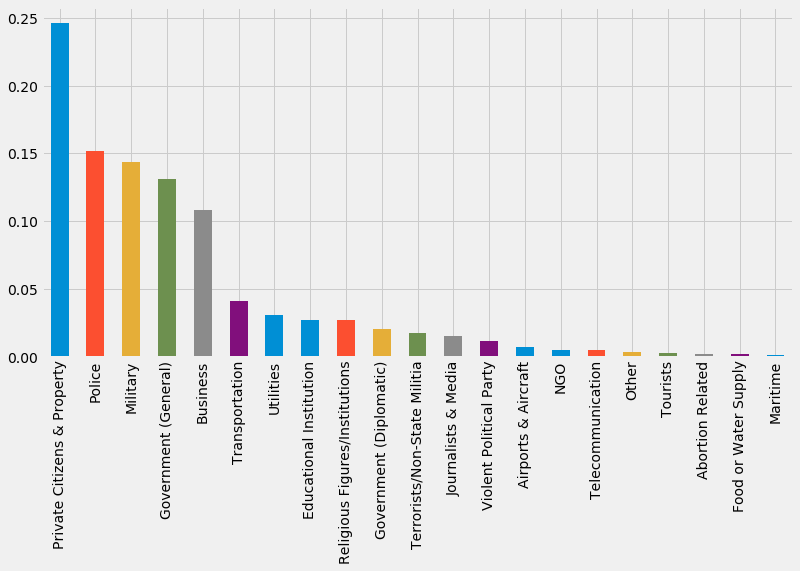

In [25]:
df.targtype1_txt.value_counts(normalize=True).plot(kind="bar", figsize = (12, 6))

In [26]:
df.individual.value_counts()

0    129717
1       390
Name: individual, dtype: int64

In [27]:
df.drop("individual", axis = 1, inplace=True)

In [28]:
df.weaptype1_txt.value_counts()

Explosives/Bombs/Dynamite                                                      69528
Firearms                                                                       40362
Unknown                                                                         8753
Incendiary                                                                      8322
Melee                                                                           2555
Chemical                                                                         229
Sabotage Equipment                                                               104
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      101
Other                                                                             91
Biological                                                                        28
Fake Weapons                                                                      21
Radiological                                                     

In [29]:
# df.weapsubtype1

In [30]:
df.property.value_counts()

 1    67313
 0    46186
-9    16608
Name: property, dtype: int64

In [31]:
df.dbsource.value_counts()

START Primary Collection                    56578
PGIS                                        40522
ISVG                                        15882
CETIS                                       13485
UMD Schmid 2012                              1006
Hewitt Project                                767
UMD Algeria 2010-2012                         420
UMD Sri Lanka 2011                            365
UMD South Africa                              352
Anti-Abortion Project 2010                    186
Eco Project 2010                              141
UMD JTMM Nepal 2012                            89
UMD Miscellaneous                              73
HSI                                            70
Hijacking DB                                   43
UMD Encyclopedia of World Terrorism 2012       30
Hyland                                         20
CBRN Global Chronology                         17
State Department 1997 Document                 16
UMD Assassinations Project                     12


In [32]:
df.INT_LOG.value_counts()

-9    68958
 0    56124
 1     5025
Name: INT_LOG, dtype: int64

In [33]:
df.ransom.value_counts()

-9.0    83156
 0.0    46246
 1.0      705
Name: ransom, dtype: int64

(0, 200)

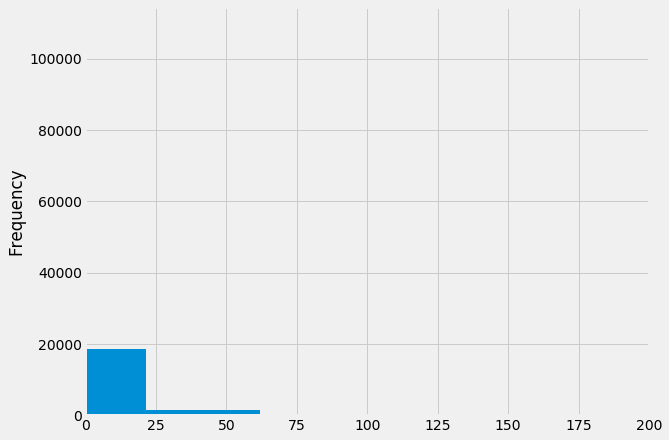

In [34]:
df.nperps.plot(kind = "hist", figsize = (9, 7), bins = 500)
plt.xlim(0, 200)

In [35]:
df.nperpcap.value_counts()

 0.0      82003
-99.0     44982
 1.0       1492
 2.0        583
 3.0        304
 4.0        229
 5.0        123
 6.0         74
 8.0         44
 7.0         41
 10.0        32
 9.0         25
 16.0        24
 13.0        22
 18.0        21
 12.0        14
 11.0        13
 15.0        12
 17.0         7
 29.0         6
 20.0         5
 26.0         4
 87.0         4
 40.0         4
 14.0         4
-9.0          3
 55.0         3
 24.0         2
 32.0         2
 28.0         2
 25.0         2
 27.0         2
 30.0         2
 19.0         2
 60.0         2
 23.0         2
 2.5          1
 406.0        1
 22.0         1
 63.0         1
 43.0         1
 41.0         1
 200.0        1
 21.0         1
 126.0        1
 45.0         1
 50.0         1
Name: nperpcap, dtype: int64

In [36]:
df.claimed.value_counts()

 0.0    73957
-9.0    42109
 1.0    14041
Name: claimed, dtype: int64

In [37]:
df.weapdetail.head()

eventid
197001000001                     no description
197001010002       Several gunshots were fired.
197001020001                  Automatic firearm
197001020002                     no description
197001020003    Firebomb consisting of gasoline
Name: weapdetail, dtype: object

Dropping weapon details because it's superflous, already have weapontype.

In [38]:
df.drop("weapdetail", axis = 1, inplace=True)

In [39]:
df.corp1.value_counts().head()

unknown                       28083
Not Applicable                 9688
Unknown                        8679
Iraqi Police Service (IPS)     3053
Civilians                      2326
Name: corp1, dtype: int64

In [40]:
df.corp1 = df.corp1.replace(to_replace="unknown", value="Unknown")

In [41]:
df.drop("weapsubtype1", axis = 1, inplace=True)

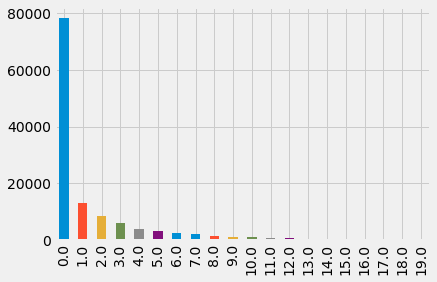

In [42]:
df.nwound.value_counts().sort_index().iloc[:20].plot(kind = "bar")

In [43]:
df.provstate.nunique()

2351

Dropping provstate because there is already a region variable

In [44]:
df.drop("provstate", axis = 1, inplace=True)

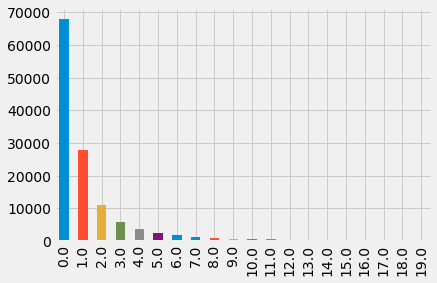

In [45]:
df.nkill.value_counts().sort_index().iloc[:20].plot(kind = "bar")

In [46]:
df.targsubtype1_txt.value_counts().shape

(110,)

There is a target type so I'm dropping targesubtype

In [47]:
df.drop(["targsubtype1_txt", "targsubtype1"], axis =1 , inplace=True)

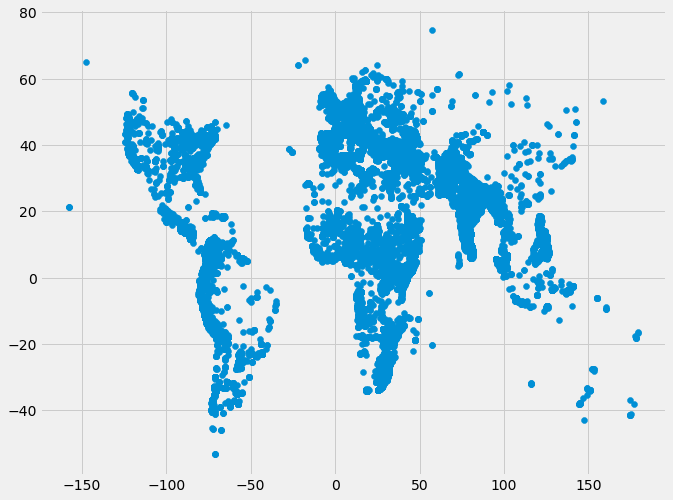

In [48]:
plt.figure(figsize=(10, 8))
plt.scatter(df.longitude, df.latitude)

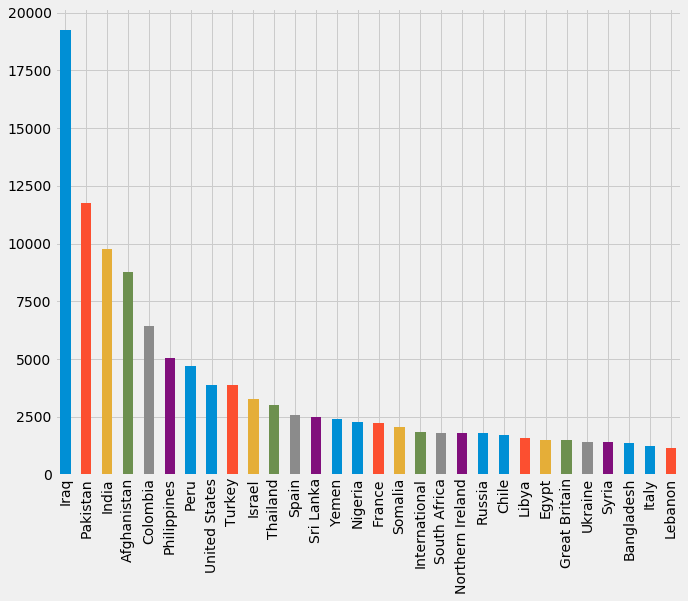

In [49]:
plt.figure(figsize=(10, 8))
df.natlty1_txt.value_counts().iloc[:30].plot(kind = "bar")

In [50]:
df.guncertain1.value_counts()

0.0    117942
1.0     12165
Name: guncertain1, dtype: int64

In [51]:
df.city.value_counts().shape

(26480,)

In [52]:
df.drop(["city"], axis = 1, inplace=True)

In [53]:
df.specificity.value_counts()

1.0    106774
3.0     11211
4.0      6118
2.0      6004
Name: specificity, dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130107 entries, 197001000001 to 201701270001
Data columns (total 44 columns):
iyear              130107 non-null int64
imonth             130107 non-null int64
iday               130107 non-null int64
extended           130107 non-null int64
country            130107 non-null int64
country_txt        130107 non-null object
region             130107 non-null int64
region_txt         130107 non-null object
vicinity           130107 non-null int64
crit1              130107 non-null int64
crit2              130107 non-null int64
crit3              130107 non-null int64
doubtterr          130107 non-null int64
multiple           130107 non-null int64
success            130107 non-null int64
suicide            130107 non-null int64
attacktype1        130107 non-null int64
attacktype1_txt    130107 non-null object
targtype1          130107 non-null int64
targtype1_txt      130107 non-null object
gname              130107 non-null object
weapty

In [55]:
drop_cols = ["attacktype1", "country", "country_txt", "region", "weaptype1", "natlty1", "targtype1"]

df.drop(drop_cols, axis = 1, inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130107 entries, 197001000001 to 201701270001
Data columns (total 37 columns):
iyear              130107 non-null int64
imonth             130107 non-null int64
iday               130107 non-null int64
extended           130107 non-null int64
region_txt         130107 non-null object
vicinity           130107 non-null int64
crit1              130107 non-null int64
crit2              130107 non-null int64
crit3              130107 non-null int64
doubtterr          130107 non-null int64
multiple           130107 non-null int64
success            130107 non-null int64
suicide            130107 non-null int64
attacktype1_txt    130107 non-null object
targtype1_txt      130107 non-null object
gname              130107 non-null object
weaptype1_txt      130107 non-null object
property           130107 non-null int64
dbsource           130107 non-null object
INT_LOG            130107 non-null int64
INT_IDEO           130107 non-null int64
INT_M

In [57]:
df.drop(["imonth", "iday"], axis = 1, inplace=True)

In [58]:
obj_cols = df.dtypes[df.dtypes == object].index.tolist()
num_cols = df.dtypes[df.dtypes != object].index.tolist()

In [59]:
df_obj = df[obj_cols].copy()
df_num = df[num_cols].copy()

In [60]:
df_obj.drop("gname", axis = 1, inplace=True)

Make dummy variables from object columns

In [61]:
df_obj.columns

Index(['region_txt', 'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt',
       'dbsource', 'corp1', 'natlty1_txt', 'target1'],
      dtype='object')

In [62]:
region_dums = pd.get_dummies(df_obj.region_txt, prefix="region")

In [63]:
region_dums.shape

(130107, 12)

In [64]:
attacktype_dums = pd.get_dummies(df_obj.attacktype1_txt, prefix="attacktype")

In [65]:
attacktype_dums.shape

(130107, 9)

In [66]:
targtype_dums = pd.get_dummies(df_obj.targtype1_txt, prefix="targettype")

In [67]:
targtype_dums.shape

(130107, 21)

In [68]:
weapontype_dums = pd.get_dummies(df_obj.weaptype1_txt, prefix="weapontype")
weapontype_dums.shape

(130107, 12)

In [69]:
dbsource_dums = pd.get_dummies(df_obj.dbsource, prefix="dbsource")
dbsource_dums.shape

(130107, 25)

In [70]:
corp_dums = pd.get_dummies(df_obj.corp1, prefix="corp")

In [71]:
corp_dums.shape

(130107, 25678)

Dropping corp because there are too many unique variables

In [72]:
df_obj.drop("corp1", axis = 1, inplace=True)

In [73]:
del corp_dums

In [74]:
nat_dums = pd.get_dummies(df_obj.natlty1_txt, prefix="nat")

In [75]:
nat_dums.shape

(130107, 200)

Dropping target1 because of too many unique variables

In [76]:
df_obj.target1.nunique()

65550

In [77]:
df_obj.drop("target1", axis = 1, inplace=True)

In [78]:
dummies = pd.concat([region_dums, attacktype_dums, weapontype_dums, dbsource_dums, nat_dums], axis = 1)

In [79]:
dummies.shape

(130107, 258)

In [80]:
df_num.shape

(130107, 26)

In [81]:
data = pd.concat([df_num, dummies], axis =1 )

Data is my clean machine learning ready dataset. All numeric values and no nulls

In [82]:
#Assign target variable
y = df.gname

In [83]:
y.value_counts()

Unknown                                                                        62336
Taliban                                                                         5750
Shining Path (SL)                                                               3635
Islamic State of Iraq and the Levant (ISIL)                                     3455
Revolutionary Armed Forces of Colombia (FARC)                                   2062
New People's Army (NPA)                                                         1958
Kurdistan Workers' Party (PKK)                                                  1904
Al-Shabaab                                                                      1872
Basque Fatherland and Freedom (ETA)                                             1717
Communist Party of India - Maoist (CPI-Maoist)                                  1656
Irish Republican Army (IRA)                                                     1582
Liberation Tigers of Tamil Eelam (LTTE)                          

In [ ]:
y.nunique()

Too many unique classes in the target variable, so I'm going to filter down to the 20 most common classes that are not unknown.

In [84]:
top20_terroristgroups = y.value_counts().iloc[1:21].index
top20_terroristgroups

Index(['Taliban', 'Shining Path (SL)',
       'Islamic State of Iraq and the Levant (ISIL)',
       'Revolutionary Armed Forces of Colombia (FARC)',
       'New People's Army (NPA)', 'Kurdistan Workers' Party (PKK)',
       'Al-Shabaab', 'Basque Fatherland and Freedom (ETA)',
       'Communist Party of India - Maoist (CPI-Maoist)',
       'Irish Republican Army (IRA)',
       'Liberation Tigers of Tamil Eelam (LTTE)', 'Boko Haram',
       'National Liberation Army of Colombia (ELN)', 'Maoists',
       'Tehrik-i-Taliban Pakistan (TTP)', 'Palestinians',
       'Al-Qaida in the Arabian Peninsula (AQAP)',
       'Manuel Rodriguez Patriotic Front (FPMR)',
       'Houthi extremists (Ansar Allah)', 'Sikh Extremists'],
      dtype='object')

Now I need to filter the rows in the data variable to only return rows that have a value in top30_terroristgroups

In [85]:
y = y[y.isin(top20_terroristgroups)].copy()

In [86]:
data = data.loc[df[df.gname.isin(top20_terroristgroups)].index].copy()

In [87]:
y.shape

(35820,)

In [88]:
data.shape

(35820, 284)

Data is prepared, time for for modeling.

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, log_loss, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

Null accuracy is 16.05%

In [96]:
y.value_counts(normalize=True).max()

0.1605248464544947

In [97]:
X = data.copy()

Logistic Regression

In [98]:
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [99]:
lr.score(X, y)

0.9631769960915689

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

In [101]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9649357900614182

In [102]:
cross_val_score(LogisticRegression(), X, y, cv = 5, scoring = "accuracy").mean()

0.9241634020707608

In [103]:
cross_val_score(LogisticRegression(), X, y, cv = 5, scoring = "neg_log_loss").mean()

-0.31211107781882663

In [106]:
# cross_val_score(LogisticRegression(), X, y, cv = 5, scoring = "precision").mean()

In [108]:
preds = lr.predict(X_test)

In [111]:
#Confusion matrix
pd.crosstab(y_test, preds)

col_0,Al-Qaida in the Arabian Peninsula (AQAP),Al-Shabaab,Basque Fatherland and Freedom (ETA),Boko Haram,Communist Party of India - Maoist (CPI-Maoist),Houthi extremists (Ansar Allah),Irish Republican Army (IRA),Islamic State of Iraq and the Levant (ISIL),Kurdistan Workers' Party (PKK),Liberation Tigers of Tamil Eelam (LTTE),Manuel Rodriguez Patriotic Front (FPMR),Maoists,National Liberation Army of Colombia (ELN),New People's Army (NPA),Palestinians,Revolutionary Armed Forces of Colombia (FARC),Shining Path (SL),Sikh Extremists,Taliban,Tehrik-i-Taliban Pakistan (TTP)
gname,,,,,,,,,,,,,,,,,,,,
Al-Qaida in the Arabian Peninsula (AQAP),222,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0
Al-Shabaab,0,448,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Basque Fatherland and Freedom (ETA),0,0,428,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Boko Haram,0,1,0,373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Communist Party of India - Maoist (CPI-Maoist),0,0,0,0,411,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Houthi extremists (Ansar Allah),20,0,0,0,0,133,0,8,0,0,0,0,0,0,0,0,0,0,0,0
Irish Republican Army (IRA),0,0,0,0,0,0,401,0,0,1,0,0,0,0,1,0,0,0,0,0
Islamic State of Iraq and the Levant (ISIL),1,1,0,0,0,0,2,905,3,0,0,0,0,0,0,0,0,0,1,0
Kurdistan Workers' Party (PKK),0,0,1,0,0,0,1,6,457,0,0,0,0,0,2,0,0,0,0,0


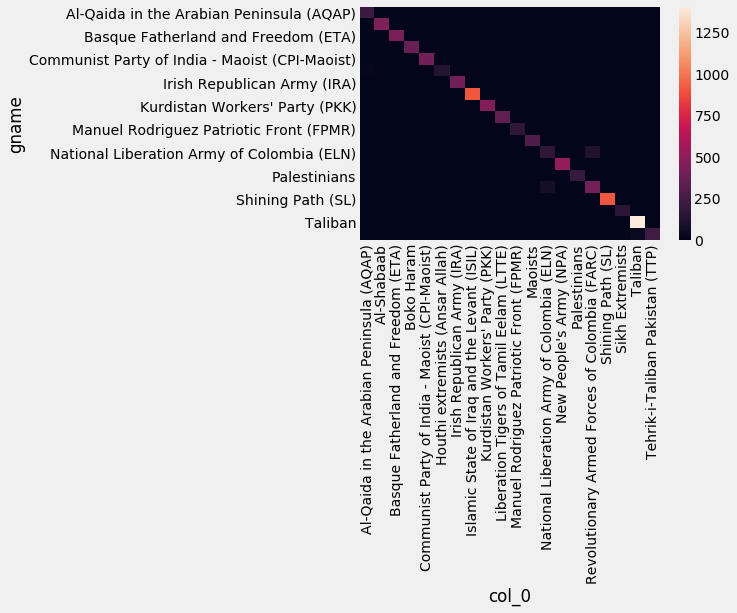

In [112]:
sns.heatmap(pd.crosstab(y_test, preds))

Derive the best groups the model is best and worst at predicting

In [114]:
cm = pd.crosstab(y_test, preds)
cm.shape

(20, 20)

In [115]:
digit_accuracy_dict = {}


for col in cm.columns:
    tp = cm.loc[col, col]
    tn = cm.drop(col).drop(col, axis = 1).sum().sum()
    indices = [e for e in cm.columns if e != col]
    fp = cm.loc[indices, col].sum()
    fn = cm.loc[col, indices].sum()
    acc_score = (tp + tn)/float(tp + tn + fp + fn)
    digit_accuracy_dict[col] = acc_score
    
sorted(digit_accuracy_dict.items(), key= lambda x:x[1], reverse = True)

[('Maoists', 1.0),
 ('Basque Fatherland and Freedom (ETA)', 0.9998883305415969),
 ('Manuel Rodriguez Patriotic Front (FPMR)', 0.9997766610831937),
 ("New People's Army (NPA)", 0.9997766610831937),
 ('Boko Haram', 0.9996649916247906),
 ('Communist Party of India - Maoist (CPI-Maoist)', 0.9996649916247906),
 ('Sikh Extremists', 0.9996649916247906),
 ('Al-Shabaab', 0.9995533221663875),
 ('Irish Republican Army (IRA)', 0.9993299832495812),
 ('Liberation Tigers of Tamil Eelam (LTTE)', 0.9992183137911781),
 ('Shining Path (SL)', 0.999106644332775),
 ("Kurdistan Workers' Party (PKK)", 0.9985482970407593),
 ('Palestinians', 0.9985482970407593),
 ('Al-Qaida in the Arabian Peninsula (AQAP)', 0.9972082635399219),
 ('Islamic State of Iraq and the Levant (ISIL)', 0.9970965940815187),
 ('Houthi extremists (Ansar Allah)', 0.9964265773311),
 ('Tehrik-i-Taliban Pakistan (TTP)', 0.995644891122278),
 ('Taliban', 0.9954215522054718),
 ('National Liberation Army of Colombia (ELN)', 0.9778894472361809),
 ('

Model predicts Maoists will 100% accuracy

Find out the most common wrong prediction for each terrorist group

In [125]:
pred_df = pd.DataFrame(list(zip(y_test.values, preds)), columns=["actual", "predictions"])

In [151]:
d = {}
for i in pred_df.actual.unique():
    v = pred_df[pred_df.actual== i].predictions.value_counts().index[:2].tolist()
    for e in v:
        if e != i:
            d[i] = e

In [152]:
d

{'Al-Qaida in the Arabian Peninsula (AQAP)': 'Islamic State of Iraq and the Levant (ISIL)',
 'Boko Haram': 'Al-Shabaab',
 'Communist Party of India - Maoist (CPI-Maoist)': 'Taliban',
 'Houthi extremists (Ansar Allah)': 'Al-Qaida in the Arabian Peninsula (AQAP)',
 'Irish Republican Army (IRA)': 'Palestinians',
 'Islamic State of Iraq and the Levant (ISIL)': "Kurdistan Workers' Party (PKK)",
 "Kurdistan Workers' Party (PKK)": 'Islamic State of Iraq and the Levant (ISIL)',
 'Liberation Tigers of Tamil Eelam (LTTE)': 'Communist Party of India - Maoist (CPI-Maoist)',
 'Manuel Rodriguez Patriotic Front (FPMR)': 'Shining Path (SL)',
 'National Liberation Army of Colombia (ELN)': 'Revolutionary Armed Forces of Colombia (FARC)',
 "New People's Army (NPA)": 'Taliban',
 'Palestinians': 'Boko Haram',
 'Revolutionary Armed Forces of Colombia (FARC)': 'National Liberation Army of Colombia (ELN)',
 'Shining Path (SL)': 'Revolutionary Armed Forces of Colombia (FARC)',
 'Sikh Extremists': 'Palestinians

Dictionary represents the relationship between terrorist group and the most common group the model misidentifiies it as.

Logistic Regression with Truncated SVD

In [163]:
trun = TruncatedSVD(n_components=X.shape[1]- 1)

In [164]:
Xt = trun.fit_transform(X)

In [167]:
trun.explained_variance_ratio_.cumsum()[:30]

array([0.01468864, 0.49227728, 0.80624861, 0.93833056, 0.96571819,
       0.99048244, 0.99715526, 0.99803556, 0.99879934, 0.99927764,
       0.99943828, 0.99955641, 0.99964216, 0.99970397, 0.99973994,
       0.99976269, 0.99978368, 0.99980111, 0.99981648, 0.99983104,
       0.99984469, 0.99985733, 0.99986864, 0.99987891, 0.99988877,
       0.99989711, 0.99990522, 0.9999129 , 0.99992016, 0.99992709])

Text(0,0.5,'Explained Varianced')

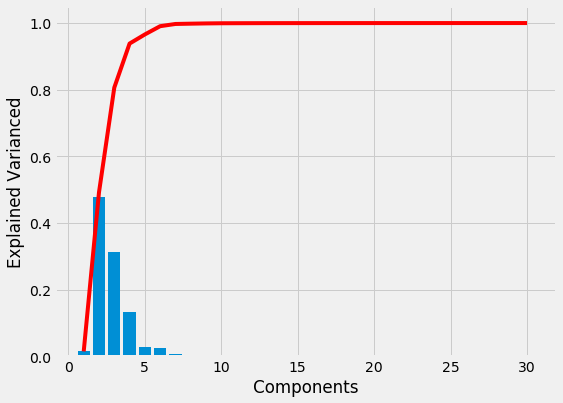

In [171]:
plt.figure(figsize=(8, 6))

components = range(1, 31)

plt.bar(components, trun.explained_variance_ratio_[:30], label = "Explained Variance Ratio")
plt.plot(components, np.cumsum(trun.explained_variance_ratio_[:30]), c = "r", label = "Cumulative Sum of Explained Variance ratios")
plt.xlabel("Components")
plt.ylabel("Explained Varianced")

Fit model with 5 components in TSVD

In [176]:
trun5 = TruncatedSVD(n_components=10)
Xt5 = trun5.fit_transform(X)

In [177]:
lr_trun5 = LogisticRegression()
lr_trun5.fit(Xt5, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [178]:
lr_trun5.score(Xt5, y)

0.8257398101619207

In [179]:
cross_val_score(LogisticRegression(), Xt5, y, cv = 5, scoring = "accuracy").mean()

0.7939681037756758

Decision Tree

In [180]:
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [181]:
dt.score(X, y)

0.7682579564489113

In [182]:
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.7681742043551089

In [183]:
depths = list(range(5, 205, 5))

params = {"max_depth":depths}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv = 5, scoring="accuracy")

grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [184]:
grid.best_params_

{'max_depth': 55}

In [185]:
grid.best_score_

0.9152987158012283

In [186]:
dt = DecisionTreeClassifier(max_depth=55)
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=55,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [187]:
feat_imp = list(zip(X.columns, dt.feature_importances_))

In [188]:
df_fi = pd.DataFrame(feat_imp, columns=["features", "scores"])

In [191]:
df_fi.sort_values(by="scores", ascending=False).head(10)

,features,scores
21,longitude,0.195157
84,nat_Afghanistan,0.136063
22,latitude,0.105956
220,nat_Peru,0.099114
164,nat_Iraq,0.080909
264,nat_Turkey,0.051955
36,region_Sub-Saharan Africa,0.048441
37,region_Western Europe,0.047784
118,nat_Colombia,0.046722
11,INT_LOG,0.043701


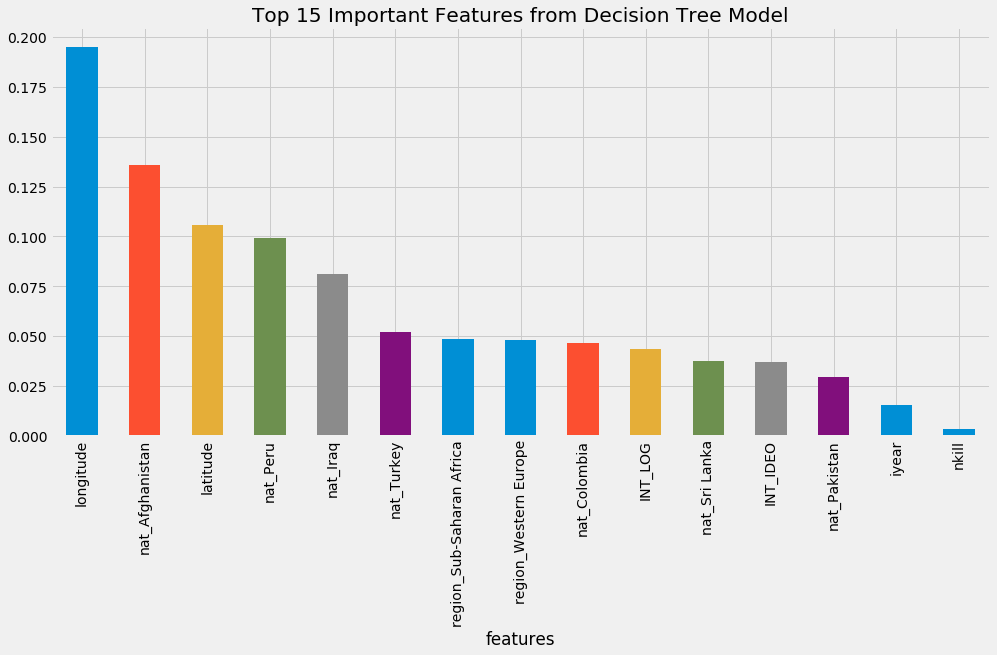

In [198]:
df_fi.sort_values(by="scores", ascending=False).iloc[:15, :].plot(kind="bar",x = "features", y= "scores", figsize = (15, 7),
                                                                 legend=False)
plt.title("Top 15 Important Features from Decision Tree Model");

Random Forest and Gradient Boosting 

In [199]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X, y)
rf.score(X, y)

0.9998045784477946

In [200]:
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.980569514237856

In [202]:
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.9819095477386934

In [203]:
params = {"n_estimators": list(range(10, 250, 10))}
grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv = 5, scoring="accuracy")

grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [204]:
grid.best_params_

{'n_estimators': 200}

In [205]:
grid.best_score_

0.9385259631490788

In [206]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

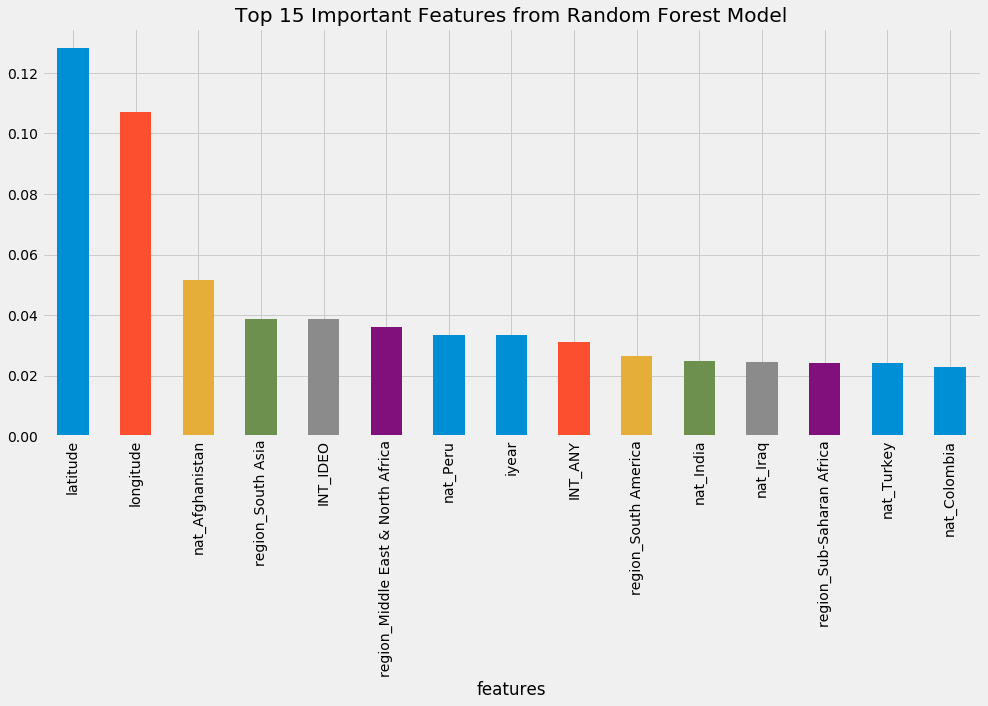

In [207]:
feat_imp = list(zip(X.columns, rf.feature_importances_))
df_fi = pd.DataFrame(feat_imp, columns=["features", "scores"])
df_fi.sort_values(by="scores", ascending=False).iloc[:15, :].plot(kind="bar",x = "features", y= "scores", figsize = (15, 7),
                                                                 legend=False)
plt.title("Top 15 Important Features from Random Forest Model");

In [208]:
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

In [209]:
#Confusion matrix
pd.crosstab(y_test, preds)

col_0,Al-Qaida in the Arabian Peninsula (AQAP),Al-Shabaab,Basque Fatherland and Freedom (ETA),Boko Haram,Communist Party of India - Maoist (CPI-Maoist),Houthi extremists (Ansar Allah),Irish Republican Army (IRA),Islamic State of Iraq and the Levant (ISIL),Kurdistan Workers' Party (PKK),Liberation Tigers of Tamil Eelam (LTTE),Manuel Rodriguez Patriotic Front (FPMR),Maoists,National Liberation Army of Colombia (ELN),New People's Army (NPA),Palestinians,Revolutionary Armed Forces of Colombia (FARC),Shining Path (SL),Sikh Extremists,Taliban,Tehrik-i-Taliban Pakistan (TTP)
gname,,,,,,,,,,,,,,,,,,,,
Al-Qaida in the Arabian Peninsula (AQAP),223,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Al-Shabaab,0,448,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Basque Fatherland and Freedom (ETA),0,0,428,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Boko Haram,0,1,0,373,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Communist Party of India - Maoist (CPI-Maoist),0,0,0,0,412,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Houthi extremists (Ansar Allah),2,0,0,0,0,159,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Irish Republican Army (IRA),0,0,0,0,0,0,403,0,0,0,0,0,0,0,0,0,0,0,0,0
Islamic State of Iraq and the Levant (ISIL),0,0,0,0,0,0,0,913,0,0,0,0,0,0,0,0,0,0,0,0
Kurdistan Workers' Party (PKK),0,0,0,0,0,0,0,4,462,0,0,0,0,0,1,0,0,0,0,0


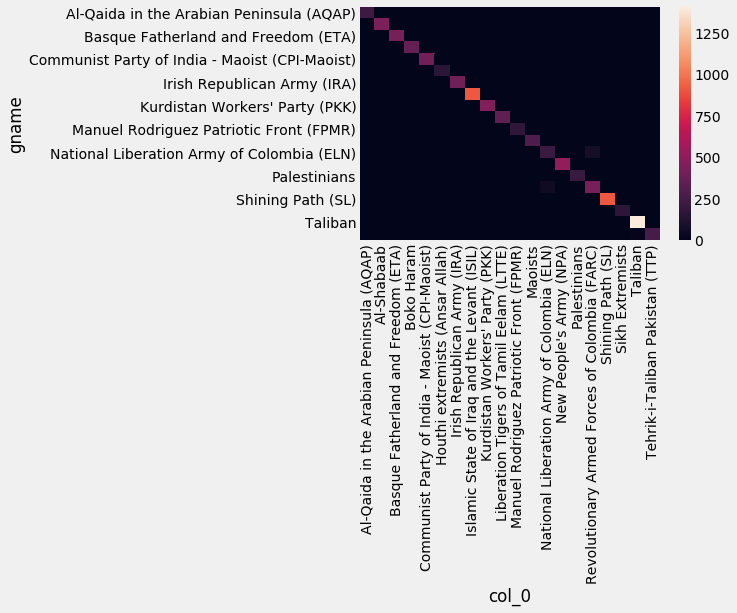

In [210]:
sns.heatmap(pd.crosstab(y_test, preds))

In [211]:
cm = pd.crosstab(y_test, preds)
cm.shape

(20, 20)

In [212]:
digit_accuracy_dict = {}


for col in cm.columns:
    tp = cm.loc[col, col]
    tn = cm.drop(col).drop(col, axis = 1).sum().sum()
    indices = [e for e in cm.columns if e != col]
    fp = cm.loc[indices, col].sum()
    fn = cm.loc[col, indices].sum()
    acc_score = (tp + tn)/float(tp + tn + fp + fn)
    digit_accuracy_dict[col] = acc_score
    
sorted(digit_accuracy_dict.items(), key= lambda x:x[1], reverse = True)

[('Communist Party of India - Maoist (CPI-Maoist)', 1.0),
 ('Irish Republican Army (IRA)', 1.0),
 ('Liberation Tigers of Tamil Eelam (LTTE)', 1.0),
 ('Sikh Extremists', 1.0),
 ('Al-Shabaab', 0.9998883305415969),
 ('Basque Fatherland and Freedom (ETA)', 0.9998883305415969),
 ('Boko Haram', 0.9998883305415969),
 ('Maoists', 0.9998883305415969),
 ('Houthi extremists (Ansar Allah)', 0.9997766610831937),
 ('Manuel Rodriguez Patriotic Front (FPMR)', 0.9997766610831937),
 ("New People's Army (NPA)", 0.9997766610831937),
 ('Palestinians', 0.9997766610831937),
 ('Shining Path (SL)', 0.9996649916247906),
 ('Al-Qaida in the Arabian Peninsula (AQAP)', 0.9995533221663875),
 ('Islamic State of Iraq and the Levant (ISIL)', 0.9993299832495812),
 ("Kurdistan Workers' Party (PKK)", 0.9993299832495812),
 ('Tehrik-i-Taliban Pakistan (TTP)', 0.9986599664991624),
 ('Taliban', 0.9985482970407593),
 ('National Liberation Army of Colombia (ELN)', 0.9844779452819654),
 ('Revolutionary Armed Forces of Colombia (

The random forest model can perfectly predict events of terror from the CPI-Maoist, IRA, and LTTE, and Sikh Extremists

In [213]:
pred_df = pd.DataFrame(list(zip(y_test.values, preds)), columns=["actual", "predictions"])

In [214]:
d = {}
for i in pred_df.actual.unique():
    v = pred_df[pred_df.actual== i].predictions.value_counts().index[:2].tolist()
    for e in v:
        if e != i:
            d[i] = e

In [215]:
d

{'Al-Qaida in the Arabian Peninsula (AQAP)': 'Islamic State of Iraq and the Levant (ISIL)',
 'Boko Haram': 'Al-Shabaab',
 'Houthi extremists (Ansar Allah)': 'Al-Qaida in the Arabian Peninsula (AQAP)',
 "Kurdistan Workers' Party (PKK)": 'Islamic State of Iraq and the Levant (ISIL)',
 'Manuel Rodriguez Patriotic Front (FPMR)': 'Shining Path (SL)',
 'Maoists': "New People's Army (NPA)",
 'National Liberation Army of Colombia (ELN)': 'Revolutionary Armed Forces of Colombia (FARC)',
 "New People's Army (NPA)": 'Taliban',
 'Palestinians': "Kurdistan Workers' Party (PKK)",
 'Revolutionary Armed Forces of Colombia (FARC)': 'National Liberation Army of Colombia (ELN)',
 'Shining Path (SL)': 'Manuel Rodriguez Patriotic Front (FPMR)',
 'Tehrik-i-Taliban Pakistan (TTP)': 'Taliban'}

Dictionary represents the relationship between terrorist group and the most common group the model misidentifiies it as.